In [1]:
from keras.models import Sequential, load_model
from keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.datasets import  cifar100
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

In [2]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

169017344/169001437 [==============================] - 13s 0us/step
(50000, 32, 32, 3) (50000, 1)


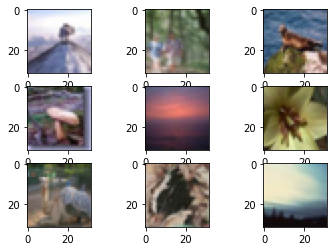

In [3]:
# Load Data
(x_train,y_train),(x_test, y_test) = cifar100.load_data()
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_test[i])
print(x_train.shape, y_train.shape)


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /=255
x_test /=255

y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

In [5]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding ='same',input_shape = (32,32,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation ='relu',kernel_initializer='he_uniform'))
model.add(Dense(100,activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [6]:
opt = SGD(lr = 0.001)
model.compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['acc'])
his = model.fit(x_train, y_train, batch_size = 64, epochs = 100, validation_data = (x_test,y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
782/782 [==============================] - 17s 8ms/step - loss: 4.6121 - acc: 0.0132 - val_loss: 4.5745 - val_acc: 0.0179
Epoch 2/100
782/782 [==============================] - 6s 8ms/step - loss: 4.5387 - acc: 0.0267 - val_loss: 4.4900 - val_acc: 0.0321
Epoch 3/100
782/782 [==============================] - 6s 8ms/step - loss: 4.3805 - acc: 0.0493 - val_loss: 4.2766 - val_acc: 0.0568
Epoch 4/100
782/782 [==============================] - 7s 9ms/step - loss: 4.1771 - acc: 0.0707 - val_loss: 4.1250 - val_acc: 0.0801
Epoch 5/100
782/782 [==============================] - 6s 8ms/step - loss: 4.0535 - acc: 0.0904 - val_loss: 4.0652 - val_acc: 0.0878
Epoch 6/100
782/782 [==============================] - 6s 8ms/step - loss: 3.9578 - acc: 0.1061 - val_loss: 3.9505 - val_acc: 0.0997
Epoch 7/100
782/782 [==============================] - 6s 8ms/step - loss: 3.8732 - acc: 0.1214 - val_loss: 3.9169 - val_acc: 0.1086
Epoch 8/100
782/782 [==============================] - 6s 8ms/step -

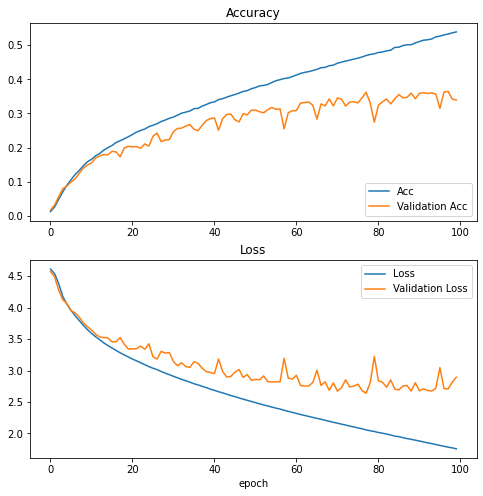

In [7]:
plot_history(his)

In [8]:
model.save('CNN_cifar100.h5')

In [10]:
dict = {0: 'apple',1: 'aquarium_fish',2: 'baby',3: 'bear',
4: 'beaver',
5: 'bed',
6: 'bee',
7: 'beetle',
8: 'bicycle',
9: 'bottle',
10:'bowl',
11: 'boy',
12: 'bridge',
13: 'bus',
14: 'butterfly',
15: 'camel',
16: 'can',
17: 'castle',
18: 'caterpillar',
19: 'cattle',
20: 'chair',
21: 'chimpanzee',
22: 'clock',
23: 'cloud',
24: 'cockroach',
25:'couch',
26: 'cra',
27: 'crocodile',
28:'cup',
29: 'dinosaur',
30: 'dolphin',
31: 'elephant',
32: 'flatfish',
33: 'forest',
34: 'fox',
35: 'girl',
36: 'hamster',
37: 'house',
38: 'kangaroo',
39: 'keyboard',
40: 'lamp',
41: 'lawn_mower',
42: 'leopard',
43: 'lion',
44: 'lizard',
45: 'lobster',
46: 'man',
47: 'maple_tree',
48: 'motorcycle',
49: 'mountain',
50: 'mouse',
51: 'mushroom',
52: 'oak_tree',
53: 'orange',
54: 'orchid',
55: 'otter',
56: 'palm_tree',
57: 'pear',
58: 'pickup_truck',
59: 'pine_tree',
60: 'plain',
61: 'plate',
62: 'poppy',
63: 'porcupine',
64: 'possum',
65: 'rabbit',
66: 'raccoon',
67: 'ray',
68: 'road',
69: 'rocket',
70: 'rose',
71: 'sea',
72: 'seal',
73: 'shark',
74: 'shrew',
75: 'skunk',
76: 'skyscraper',
77: 'snail',
78: 'snake',
79: 'spider',
80: 'squirrel',
81: 'streetcar',
82: 'sunflower',
83: 'sweet_pepper',
84: 'table',
85: 'tank',
86: 'telephone',
87: 'television',
88: 'tiger',
89: 'tractor',
90: 'train',
91: 'trout',
92: 'tulip',
93: 'turtle',
94: 'wardrobe',
95: 'whale',
96: 'willow_tree',
97: 'wolf',
98: 'woman',
99: 'worm'}

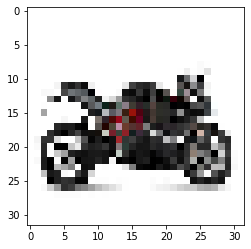

motorcycle


In [12]:
img = tf.keras.utils.load_img("testmt.jpg", target_size = (32,32))
plt.imshow(img)
plt.show()
img = tf.keras.utils.img_to_array(img)
img = img.reshape(1,32,32,3)
img = img.astype('float32')
img /=255
print(dict[np.argmax(model.predict(img),axis = 1)[0]])